In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support


In [2]:

from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
import 

In [34]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning Taiwan Data\training_set_autoencoded.csv')
df_ROS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning Taiwan Data\training_ROS_autoencoded.csv')
df_RUS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning Taiwan Data\training_RUS_autoencoded.csv')
df_SMOTE=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning Taiwan Data\training_SMOTE_autoencoded.csv')
#df_cnn=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning Taiwan Data\training_cnn_autoencoded.csv')
df_test=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning Taiwan Data\test_set_autoencoded.csv')
df_validation=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning Taiwan Data\validation_set_autoencoded.csv')
x_val=df_validation.iloc[:,:-1]
y_val=df_validation.iloc[:,-1]
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
x_ov=df_ROS.iloc[:,:-1]
y_ov=df_ROS.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
x_under = df_RUS.iloc[:,:-1]
y_under=df_RUS.iloc[:,-1]
x_smote=df_SMOTE.iloc[:,:-1]
y_smote=df_SMOTE.iloc[:,-1]
#x_cnn=df_cnn.iloc[:,:-1]
#y_cnn=df_cnn.iloc[:,-1]

In [4]:
clf =tree.DecisionTreeClassifier()
ada = AdaBoostClassifier()
rfc =ensemble.RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [5]:
from sklearn import metrics

sampling_methods =['No Sampling','Over Sampling','Under Sampling', 'SMOTE Sampling','CNN Sampling']
sampling_methods1x =[x_train,x_ov,x_under,x_smote,x_cnn]
sampling_methods1y=[y_train,y_ov, y_under, y_smote, y_cnn]
ml_methods=[clf,rfc,ada,gbc]
label=['dec tree','rfc','ada','gradboost']
dict1 ={'precision': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]},'recall': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}, 'f1':{'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}}
for j in range(len(ml_methods)):
    ml =ml_methods[j]
    label[j]
    print(ml)
    for i in range(len(sampling_methods)):
        #print(sampling_methods[i])
        model=ml.fit(sampling_methods1x[i],sampling_methods1y[i])
        y_pred =model.predict(x_test)
        precision,recall,f1,none =precision_recall_fscore_support(y_pred,y_test,average='weighted')
        accuracy =accuracy_score(y_pred,y_test)
        dict1['precision'][sampling_methods[i]].append(precision)
        dict1['recall'][sampling_methods[i]].append(recall)
        dict1['f1'][sampling_methods[i]].append(f1)
print(dict1)

DecisionTreeClassifier()
RandomForestClassifier()


C:\Users\Mollie\Documents\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier()


C:\Users\Mollie\Documents\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier()
{'precision': {'No Sampling': [0.6125844954683067, 0.6052096462658832, 1.0, 0.9993339039467428], 'Over Sampling': [0.9944248533840546, 1.0, 0.4887063219091176, 0.5734126903339012], 'Under Sampling': [0.5530432775702893, 0.617649302782736, 0.9809959673147797, 0.8623223175634074], 'SMOTE Sampling': [0.6087606745090168, 0.9989851957521003, 0.5583019424273054, 0.5698293910509913], 'CNN Sampling': [0.7721361290522991, 0.8303045447557967, 0.48747566649223295, 0.939417839235805]}, 'recall': {'No Sampling': [0.37044444444444447, 0.6255555555555555, 0.7788888888888889, 0.22177777777777777], 'Over Sampling': [0.7764444444444445, 0.7788888888888889, 0.5135555555555555, 0.6011111111111112], 'Under Sampling': [0.5228888888888888, 0.37844444444444447, 0.23022222222222222, 0.2797777777777778], 'SMOTE Sampling': [0.45711111111111113, 0.7784444444444445, 0.37666666666666665, 0.6028888888888889], 'CNN Sampling': [0.6993333333333334, 0.2917777777777778, 0.5273333333333333, 0.

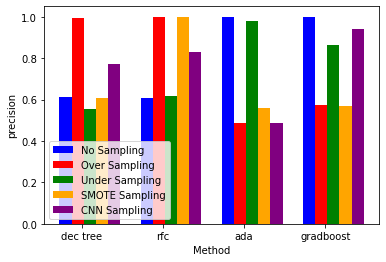

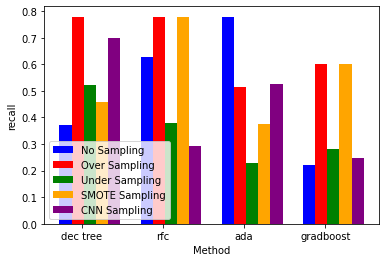

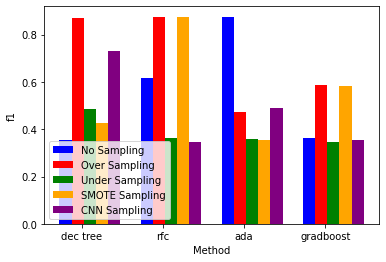

In [6]:
evaluation_metric= ['precision','recall','f1']
x=np.arange(4)
width=0.15
for n in evaluation_metric:
    plt.bar(x-0.2, dict1[n]['No Sampling'], width,color='blue')
    plt.bar(x-0.05, dict1[n]['Over Sampling'], width,color ='red')
    plt.bar(x+0.1, dict1[n]['Under Sampling'],width,color='green')
    plt.bar(x+0.25, dict1[n]['SMOTE Sampling'], width,color='orange')
    plt.bar(x+0.4, dict1[n]['CNN Sampling'], width,color='purple')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel(n)
    plt.xlabel('Method')
    plt.xticks(x,label)
    plt.legend(sampling_methods,loc='lower left')
    plt.show()

In [35]:
clf =tree.DecisionTreeClassifier(max_depth= 8, min_samples_leaf= 10, min_samples_split= 6)
ada = AdaBoostClassifier(learning_rate= 0.9, n_estimators= 200)
rfc =ensemble.RandomForestClassifier(class_weight= None, criterion= 'gini', n_estimators= 1000)
gbc=GradientBoostingClassifier()

In [36]:
sampling_methods =['No Sampling','Over Sampling','Under Sampling', 'SMOTE Sampling','CNN Sampling']
sampling_methods1x =[x_train,x_ov,x_under,x_smote,x_cnn]
sampling_methods1y=[y_train,y_ov, y_under, y_smote, y_cnn]
ml_methods=[clf,rfc,ada,gbc]
label=['Decision Tree','Random Forest','AdaBoost','GradientBoost']
dict1 ={'Accuracy Score': {'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}, 'F1 Score':{'No Sampling': [],'Over Sampling':[], 'Under Sampling':[], 'SMOTE Sampling':[], 'CNN Sampling':[]}}
for j in range(len(ml_methods)):
    ml =ml_methods[j]
    label[j]
    print(ml)
    for i in range(len(sampling_methods)):
        #print(sampling_methods[i])
        model=ml.fit(sampling_methods1x[i],sampling_methods1y[i])
        y_pred =model.predict(x_test)
        precision,recall,f1,none =precision_recall_fscore_support(y_pred,y_test,average='weighted')
        accuracy =accuracy_score(y_pred,y_test)
        dict1['Accuracy Score'][sampling_methods[i]].append(accuracy)
        #dict1['recall'][sampling_methods[i]].append(recall)
        dict1['F1 Score'][sampling_methods[i]].append(f1)
        
print(dict1)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=6)
RandomForestClassifier(n_estimators=1000)
AdaBoostClassifier(learning_rate=0.9, n_estimators=200)
GradientBoostingClassifier()
{'Accuracy Score': {'No Sampling': [0.7982222222222223, 0.8128888888888889, 0.8075555555555556, 0.8082222222222222], 'Over Sampling': [0.7377777777777778, 0.7944444444444444, 0.7444444444444445, 0.7593333333333333], 'Under Sampling': [0.7533333333333333, 0.704, 0.7328888888888889, 0.7482222222222222], 'SMOTE Sampling': [0.7264444444444444, 0.7706666666666667, 0.7351111111111112, 0.7551111111111111], 'CNN Sampling': [0.5277777777777778, 0.36577777777777776, 0.682, 0.4782222222222222]}, 'F1 Score': {'No Sampling': [0.8220506824137113, 0.8344498943036185, 0.8377924255087693, 0.8381117835726943], 'Over Sampling': [0.72904114957637, 0.805726112789497, 0.7322057227145167, 0.7508579773971541], 'Under Sampling': [0.749293349563644, 0.6829572902959268, 0.7181255335388784, 0.7362430078687389], 

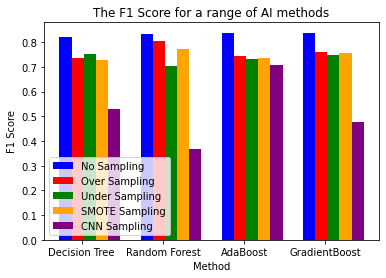

In [37]:
evaluation_metric= ['Accuracy Score','F1 Score']
x=np.arange(4)
width=0.15
d= ' autoencoder 16'
g=".png"
for n in evaluation_metric:
    plt.bar(x-0.2, dict1[n]['No Sampling'], width,color='blue')
    plt.bar(x-0.05, dict1[n]['Over Sampling'], width,color ='red')
    plt.bar(x+0.1, dict1[n]['Under Sampling'],width,color='green')
    plt.bar(x+0.25, dict1[n]['SMOTE Sampling'], width,color='orange')
    plt.bar(x+0.4, dict1[n]['CNN Sampling'], width,color='purple')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel(n)
    plt.xlabel('Method')
    plt.xticks(x,label)
    plt.title('The ' +str(n) +' for a range of AI methods')
    plt.legend(sampling_methods,loc='lower left')
    plt.savefig("".join((n,d,g)))

In [9]:
from sklearn.model_selection import GridSearchCV

In [8]:
#decision tree optimise parameters _param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=clf,param_grid=parameters,scoring = 'f1_weighted',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(x_val,y_val)

In [10]:
best_f1_dt = grid_search_dt.best_score_
print('f1 on Cross Validation set :',best_f1_dt)
best_parameters_1 = grid_search_dt.best_params_
best_parameters_1

f1 on Cross Validation set : 0.7615177879188157


{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 6}

In [11]:
y_pred_dct_tuned = grid_search_dt.predict(x_test)
precision_dct,recall_dct,f1_dct,none =precision_recall_fscore_support(y_pred_dct_tuned,y_test,average='weighted')
accuracy_dct =accuracy_score(y_pred_dct_tuned,y_test)

In [12]:
model_results =  pd.DataFrame([['Decision Tree Tuned', accuracy_dct,precision_dct,recall_dct, f1_dct]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.720222,0.815122,0.720222,0.76174


In [13]:
param_grid_rfc = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid_rfc,scoring='f1_weighted',cv=5,n_jobs=-1)
grid_search_rfc = grid_search_rfc.fit(x_val,y_val)

In [14]:
best_f1_rfc = grid_search_rfc.best_score_
print('f1 on Cross Validation set :',best_f1_rfc)
best_parameters_2 = grid_search_rfc.best_params_
best_parameters_2

f1 on Cross Validation set : 0.7696909661928879


{'class_weight': None, 'criterion': 'gini', 'n_estimators': 1000}

In [15]:
y_pred_rfc_tuned = grid_search_rfc.predict(x_test)
from sklearn.metrics import precision_score

In [16]:
precision_rfc,recall_rfc,f1_rfc,none =precision_recall_fscore_support(y_pred_rfc_tuned,y_test,average= 'weighted')
precision =precision_score(y_pred_rfc_tuned,y_test)
accuracy_rfc =accuracy_score(y_pred_rfc_tuned,y_test)
model_rfc=  pd.DataFrame([['Random Forest Tuned', accuracy_rfc,precision_rfc,recall_rfc, f1_rfc]],
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_rfc

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Tuned,0.777333,0.989239,0.777333,0.869276


In [17]:
model_results = model_results.append(model_rfc, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.720222,0.815122,0.720222,0.761740
1,Random Forest Tuned,0.777333,0.989239,0.777333,0.869276


In [18]:
param_grid_ada = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
              'n_estimators': [50,60,70,80,90,100,150, 200]}
grid_search_ada = GridSearchCV(estimator=ada,param_grid=param_grid_ada,scoring='f1',cv=5,n_jobs=-1)
grid_search_ada = grid_search_ada.fit(x_val,y_val)

In [19]:
best_f1_ada = grid_search_ada.best_score_
print('f1 on Cross Validation set :',best_f1_ada)
best_parameters_3 = grid_search_ada.best_params_
best_parameters_3
y_pred_ada_tuned = grid_search_ada.predict(x_test)
f = np.where(y_pred_ada_tuned == 1)
print(f)
precision_ada,recall_ada,f1_ada,none =precision_recall_fscore_support(y_pred_ada_tuned,y_test,average='weighted')
accuracy_ada =accuracy_score(y_pred_ada_tuned,y_test)
model_ada=  pd.DataFrame([['AdaBoost tuned', accuracy_ada,precision_ada,recall_ada, f1_ada]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_ada

f1 on Cross Validation set : 0.3594913549253943
(array([ 592, 1263, 1855, 1992, 2003, 2304, 3043, 3322, 4252, 4298],
      dtype=int64),)


,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoost tuned,0.777556,0.995505,0.777556,0.872862


In [20]:
model_results = model_results.append(model_ada, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Tuned,0.720222,0.815122,0.720222,0.761740
1,Random Forest Tuned,0.777333,0.989239,0.777333,0.869276
2,AdaBoost tuned,0.777556,0.995505,0.777556,0.872862


In [21]:
best_parameters_3

{'learning_rate': 0.9, 'n_estimators': 200}

In [42]:
param_grid_gbc = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], 
                  'n_estimators': [50,60,70,80,90,100,150, 200],
                  'criterion':['friedman_mse', 'squared_error', 'mse', 'mae']}
grid_search_gbc = GridSearchCV(estimator=gbc,param_grid=param_grid_gbc,scoring='f1',cv=5,n_jobs=-1)
grid_search_gbc = grid_search_gbc.fit(x_val,y_val)

KeyboardInterrupt: 

In [ ]:
best_f1_gbc = grid_search_gbc.best_score_
print('f1 on Cross Validation set :',best_f1_gbc)
best_parameters_4 = grid_search_gbc.best_params_
best_parameters_4
y_pred_gbc_tuned = grid_search_gbc.predict(x_test)
precision_gbc,recall_gbc,f1_gbc,none =precision_recall_fscore_support(y_pred_gbc_tuned,y_test,average='weighted')
accuracy_gbc =accuracy_score(y_pred_gbc_tuned,y_test)
model_gbc=  pd.DataFrame([['Gradient Boosted Decision Tree', accuracy_gbc,precision_gbc,recall_gbc, f1_gbc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_gbc

In [ ]:
model_results = model_results.append(model_gbc, ignore_index = True)
model_results
df.to_csv('file_name.csv')

In [ ]:
#now i just need to plot ROC Curves and plot new scores on 